### Loading the super-tensor

Testing the class __super_tensor__ to load the super-tensor, and compute the cortical temporal networks.

In [1]:
import numpy             as     np
import matplotlib.pyplot as     plt
from   GDa.super_tensor  import super_tensor

Define parameters to instantiate class __super_tensor__, *freqs*, and *delta* should be the same used on __spectral_analysis__ class to compute pairwise coherences. Here, we will define the parameter __trial_subset__ as 10, therefore only ten trials will be loaded in order to save time.

In [26]:
# Frequency axis used to compute coherence
freqs = np.arange(4,60,2)
# Delta used to downsample time in coherence computation
delta = 15
# Intantiating supe_tensor class
st = super_tensor(raw_path = 'GrayLab/', monkey = 'lucy', 
                  date = '150128', session = 1, delta = delta, freqs = freqs, trial_subset = None)

Next we use the method __load_super_tensor__ to load the coherence matrices, it can take a long time depending on the number of trial and pairs in the session, we can measure the loading time by calling the time module.

The super-tensor has dimensions [Number of pairs, Number of frequency bands, Number of trials, Time]. However, we can average the super tensor in the bands of interest, for instance:

- $\theta$  = [4,8[    Hz;
- $\alpha$  = [8,15[   Hz;
- $\beta$   = [15,30[ Hz;
- $\gamma$  = [30,60[ Hz;

using the parameter __bands__ and __average_bands=True__, in this case Number of frequency bands=len(bands).

In [27]:
# Frequency bands to be averaged
bands = np.array([[4,8],[8,15],[15,30],[30,60]])

import time

start = time.time()
st.load_super_tensor(bands = bands, average_bands=True)
end = time.time()

print('Elapsed time to load super-tensor: ' +str((end - start)/60) + ' min.' )

Elapsed time to load super-tensor: 1.2692875027656556 min.


Let's plot the first trial of the supertensor for each band:

Text(0.5, 0, 'Time (s)')

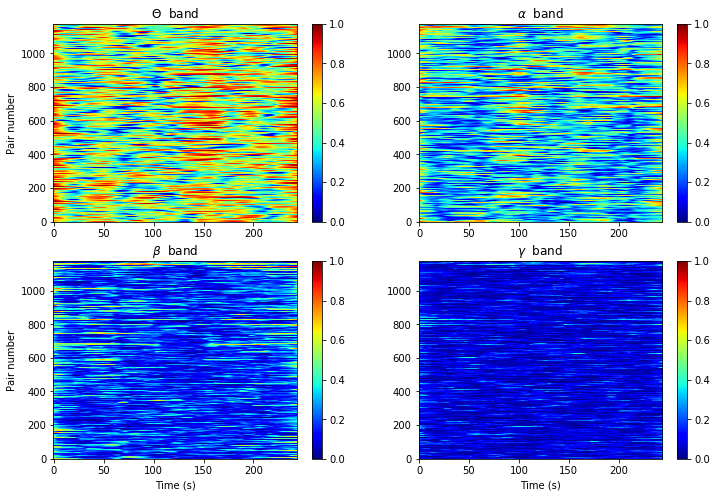

In [4]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(st._super_tensor[:,0,0,:], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\Theta$  band')
plt.ylabel('Pair number')
plt.subplot(2,2,2)
plt.imshow(st._super_tensor[:,0,1,:], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\alpha$  band')
plt.subplot(2,2,3)
plt.imshow(st._super_tensor[:,0,2,:], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\beta$  band')
plt.ylabel('Pair number')
plt.xlabel('Time (s)')
plt.subplot(2,2,4)
plt.imshow(st._super_tensor[:,0,3,:], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\gamma$  band')
plt.xlabel('Time (s)')

In [5]:
start = time.time()
st.save_h5()
end = time.time()
print('Elapsed time to save super-tensor: ' +str((end - start)/60) + ' min.' )

Elapsed time to save super-tensor: 1.6613994479179381 min.


In [6]:
import h5py
start = time.time()
hf = h5py.File('super_tensors/lucy_session01_150128.h5', 'r')
tensor = np.array(hf.get('supertensor'))
hf.close()
end = time.time()
print('Elapsed time to load HDF5 file: ' +str((end - start)/60) + ' min.' )

Elapsed time to load HDF5 file: 0.06176733175913493 min.


Let's convert the super-tensor into a network

In [7]:
# Adjacency matrix
A = np.zeros([49,49,540,4,244])
for i in range(st.pairs.shape[0]):
    e1, e2 = st.pairs[i,0], st.pairs[i,1]
    A[e1, e2,:,:,:] = st._super_tensor[i,:,:,:]

In [28]:
st.t_cue_on[0]   -= st.t_cue_on[0]
st.t_cue_off[0]  -= st.t_cue_on[0]
st.t_match_on[0] -= st.t_cue_on[0]

for t in range(244):
    plt.figure(figsize=(12,10))
    plt.imshow(A[:,:,0,0,t]+A[:,:,0,0,t].T,aspect='auto',cmap='jet',origin='lower', vmin=0, vmax=1);plt.colorbar()
    if st.tarray[t] < st.t_cue_on[0]/1000:
        plt.title('Time label = ' + str(t) + ', stage = Baseline')
    if st.tarray[t] >= st.t_cue_on[0]/1000 and  st.tarray[t] < st.t_cue_off[0]/1000:
        plt.title('Time label = ' + str(t) + ', stage = Cue')
    if st.tarray[t] >= st.t_cue_off[0]/1000 and st.tarray[t] < st.t_match_on[0]/1000:
        plt.title('Time label = ' + str(t) + ', stage = Delay')
    if st.tarray[t] > st.t_match_on[0]/1000:
        plt.title('Time label = ' + str(t) + ', stage = Match')
    plt.xticks(range(49), st.areas, rotation = 90)
    plt.yticks(range(49), st.areas)
    plt.savefig('figures/'+str(t)+'.png', dpi = 300)
    plt.close()

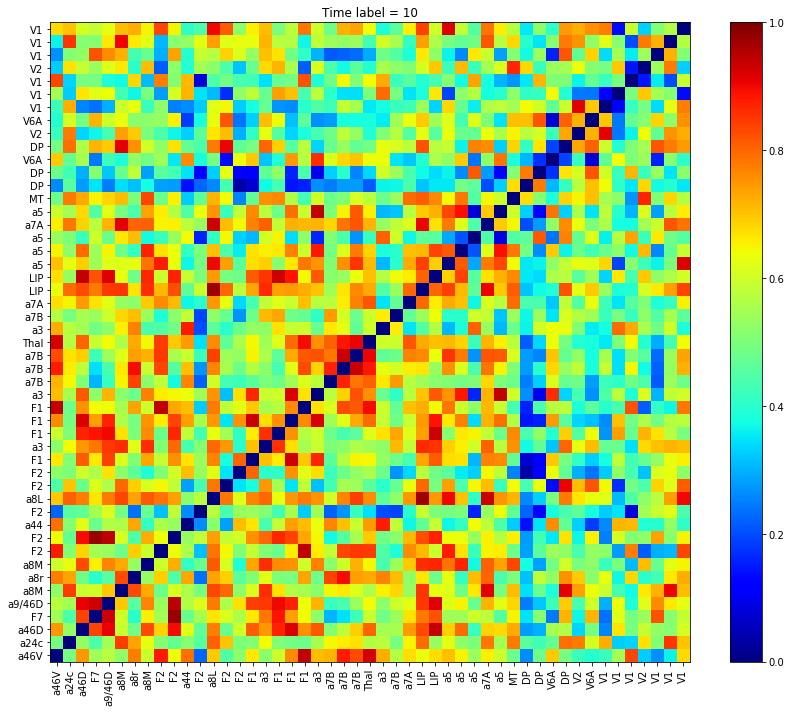

In [24]:
plt.figure(figsize=(12,10))
plt.imshow(A[:,:,0,0,10]+A[:,:,0,0,10].T,aspect='auto',cmap='jet',origin='lower', vmin=0, vmax=1);plt.colorbar()
plt.title('Time label = ' + str(10))
plt.xticks(range(49), st.areas, rotation = 90)
plt.yticks(range(49), st.areas)
plt.tight_layout()

In [18]:
st.t_cue_on[0]/1000

0.0

In [19]:
st.t_cue_off[0]/1000

1.371

In [20]:
st.t_match_on[0]/1000

2.824